### Final Data Exploration

#### Import relevant packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#### Read the datasets into dataframes.

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv")

#### Find out number of observations and columns.

In [3]:
print("Shape is:", df.shape)

Shape is: (129971, 14)


In [4]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Column data types.

In [5]:
df.dtypes

id                         int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

#### Data Cleaning:
#### taster_name, taster_twitter_handle, id, and description are unnecessary

In [6]:
df.drop(['taster_name', 'taster_twitter_handle', 'id', 'description'], axis=1, inplace=True)

In [7]:
df.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'title', 'variety', 'winery'],
      dtype='object')

In [8]:
df.shape

(129971, 10)

#### Check for number of unique categories for categorical variables.

In [9]:
print(df.nunique())

country            43
designation     37976
points             21
price             390
province          425
region_1         1229
region_2           17
title          118840
variety           707
winery          16757
dtype: int64


In [10]:
for col in df.columns:
    #print(df[col].unique()) # to print categories name only
    print(df[col].value_counts()) # to print count of every category

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

#### Cheapest Price is 4 dollars, most expensive is 3300 dollars.

In [11]:
df['price'].max() #3300
df['price'].min() #4

4.0

#### Check for missing values.

In [12]:
df.isnull().sum()

country           63
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
title              0
variety            1
winery             0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

,country,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#### We lose too much data (it becomes 34k rows) if I were to drop rows with nulls. 
#### Thus for machine learning, we will impute missing values with the most frequent value.

In [14]:
#drop the observation(s) with missing values
#df.dropna(inplace=True)
#show there are no more observations with missing values
#df.isnull().sum()

#### Look at the distribution of the target columns. for categorical type, find out if it is imblanced. For numeric type, see how it is distributed  (summary statistics, boxplot, histogram).

In [15]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


#### Average price is 35 dollars.
#### Average review is 88 points.

<AxesSubplot: >

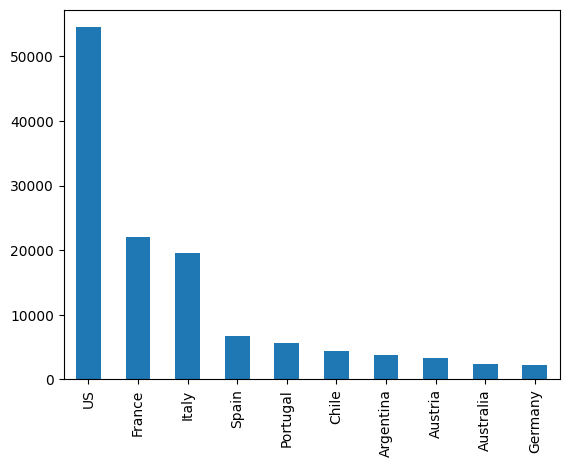

In [16]:
df['country'].value_counts().nlargest(10).plot(kind='bar') 

#### U.S. originated wine is the most reviewed, followed by France, Italy, Spain etc. 

In [17]:
fig = px.bar(df['country'].value_counts().nlargest(10), y='country')
fig.update_layout(
    title='Count of Reviews By Country',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Country'
    )
    )

fig.show()

#### Breakdown of most frequently reviewed wine origins by country and province.

In [18]:
df['province'].groupby(df['country']).value_counts().nlargest(10)

country    province        
US         California          36247
           Washington           8639
France     Bordeaux             5941
Italy      Tuscany              5897
US         Oregon               5373
France     Burgundy             3980
Spain      Northern Spain       3851
Italy      Piedmont             3729
Argentina  Mendoza Province     3264
Italy      Veneto               2716
Name: province, dtype: int64

#### Top 10 most expensive wines

In [19]:
#ten_max = df['price'].nlargest(n=10) will only take index and price
ten_max = df.nlargest(n=10, columns=['price'])
ten_max

,country,designation,points,price,province,region_1,region_2,title,variety,winery
80290,France,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
15840,France,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
98380,France,NaN,96,2500.0,Burgundy,La Romanée,NaN,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
65352,France,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
113564,France,NaN,96,2000.0,Burgundy,La Romanée,NaN,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
1558,France,NaN,98,1900.0,Bordeaux,Margaux,NaN,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
111753,France,NaN,100,1500.0,Bordeaux,Pauillac,NaN,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
1575,France,NaN,96,1300.0,Bordeaux,Pauillac,NaN,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild


<AxesSubplot: xlabel='country'>

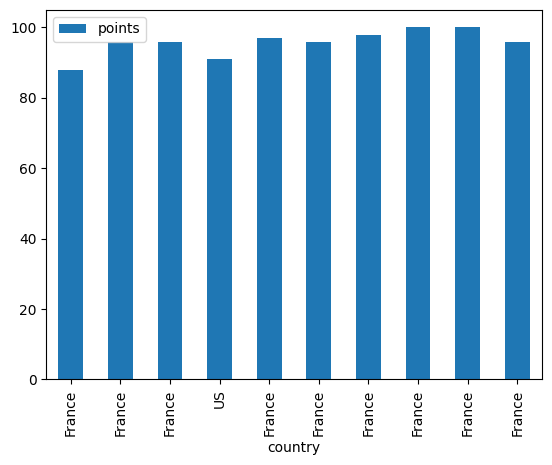

In [20]:
ten_max.plot(kind='bar', x='country', y='points') 

In [21]:
fig = px.bar(ten_max, x='country', y='price', color='title')
fig.update_layout(
    title='Top 10 Most Expensive Wines',
    legend_title='Name',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Price',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Country'
    )
    )

fig.show()

#### Top 10 Cheapest wines

In [22]:
ten_min = df.nsmallest(n=10, columns=['price'])
ten_min

,country,designation,points,price,province,region_1,region_2,title,variety,winery
1987,Spain,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis
20484,US,NaN,85,4.0,California,Clarksburg,Central Valley,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote
29553,Argentina,Red,84,4.0,Mendoza Province,Mendoza,NaN,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
31530,US,NaN,84,4.0,California,California,California Other,Bandit NV Chardonnay (California),Chardonnay,Bandit
59507,US,Unoaked,83,4.0,California,California,California Other,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties
61768,Spain,NaN,84,4.0,Levante,Yecla,NaN,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal
64590,US,NaN,86,4.0,California,California,California Other,Bandit NV Merlot (California),Merlot,Bandit
110255,US,NaN,84,4.0,California,California,California Other,Bandit NV Merlot (California),Merlot,Bandit
112919,Spain,Estate Bottled,84,4.0,Levante,Yecla,NaN,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal
117303,Spain,Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis


In [23]:
fig = px.bar(ten_min, x='country', y='price', color='title')
fig.update_layout(
    title='Top 10 Cheapest Wines',
    legend_title='Name',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Price',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Country'
    )
    )

fig.show()

#### Do higher reviews lead to higher price? What kind of relationship do they have? 

#### Scatter Plot

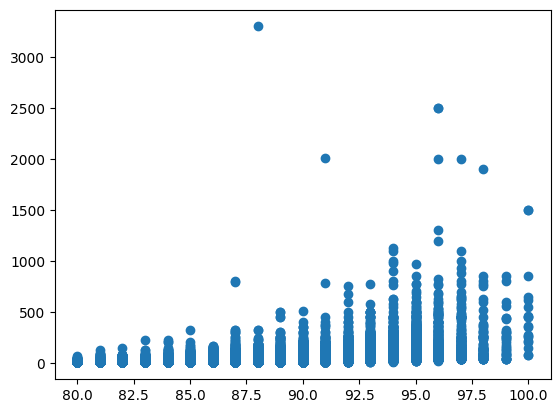

In [24]:
#X is review points
#Y is price

x = df['points']
y = df['price']

#points has 0 nulls, but price has 8996 nulls. 
#we need to take care of the nulls first.

#impute nulls with the mean.
y = y.fillna(y.mean())

plt.scatter(x, y)
plt.show()

In [25]:
fig = px.scatter(df, x="points", y="price", color="country", hover_name="country")
fig.update_layout(
    title='Wine Review and Price',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Price',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Points',
        titlefont_size=16,
        tickfont_size=14,
    )
    )
fig.show()

#### This implies yes, but up to around 500 dollars. After 500 dollars the positive relationship plateaus.
#### Limitation: The points appear to be structured, they are uniformly distributed a few points apart.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c684e12a-2caf-4332-a376-3ad8608a07be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>